In [13]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#한글 폰트 설정
plt.rcParams['font.family'] = 'Moneygraphy Rounded' # SejongGeulggot, Moneygraphy Rounded
plt.rcParams['axes.unicode_minus'] = False

## [절대값]

### 1-1 참돔_가락 ~ KOSPI 

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 306일 | 0.5895 | 6.8055e-133 |

     타임래그(일)  피어슨 상관계수           P-값
0          1  0.313295  2.053518e-40
1          2  0.315161  7.052807e-41
2          3  0.317071  2.341242e-41
3          4  0.319546  5.464389e-42
4          5  0.321326  1.933738e-42
..       ...       ...           ...
594      595  0.373843  1.434595e-38
595      596  0.371742  4.310827e-38
596      597  0.370260  9.516173e-38
597      598  0.369163  1.737921e-37
598      599  0.367194  4.798746e-37

[599 rows x 3 columns]


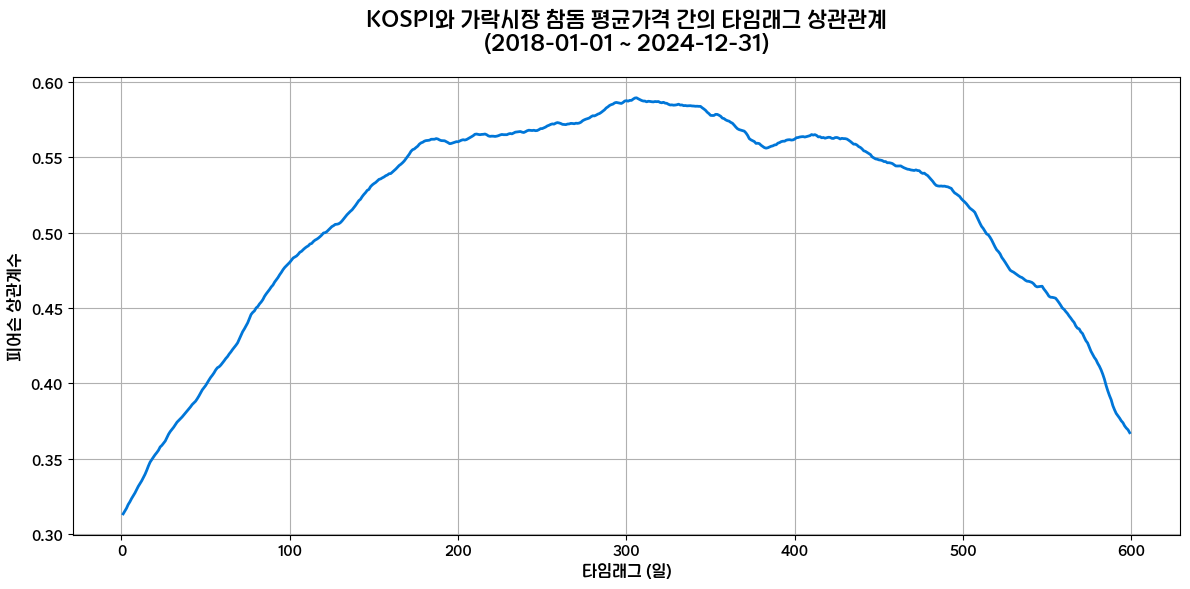

KOSPI와 가락시장 참돔 평균가격의 상관계수가 가장 높은 타임래그는 306일 입니다.
최대 피어슨 상관계수: 0.5895
P-값: 6.8055e-133


In [22]:
# 경제지표 데이터 로드
df_kospi = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])


# 날짜 범위 지정 
start_date = '2018-01-01'
end_date = '2024-12-31'

# 참돔 데이터 필터링 (가락시장)
df_bream = df_price[
    (df_price['item'] == '참돔') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_bream, df_kospi, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    kospi_lagged = df_merged['KOSPI'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        kospi_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )

# 타이틀 크기 변경
plt.title(f'KOSPI와 가락시장 참돔 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )

plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('kospi_bream_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'KOSPI와 가락시장 참돔 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-2 참돔_가락 ~ USD/KRW

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 1일 | 0.8286 |  0.000000e+00 |

     타임래그(일)  피어슨 상관계수           P-값
0          1  0.828637  0.000000e+00
1          2  0.828050  0.000000e+00
2          3  0.827284  0.000000e+00
3          4  0.826155  0.000000e+00
4          5  0.825122  0.000000e+00
..       ...       ...           ...
594      595  0.564831  1.232956e-95
595      596  0.565449  8.407622e-96
596      597  0.565653  8.435372e-96
597      598  0.567223  2.360318e-96
598      599  0.567162  3.033885e-96

[599 rows x 3 columns]


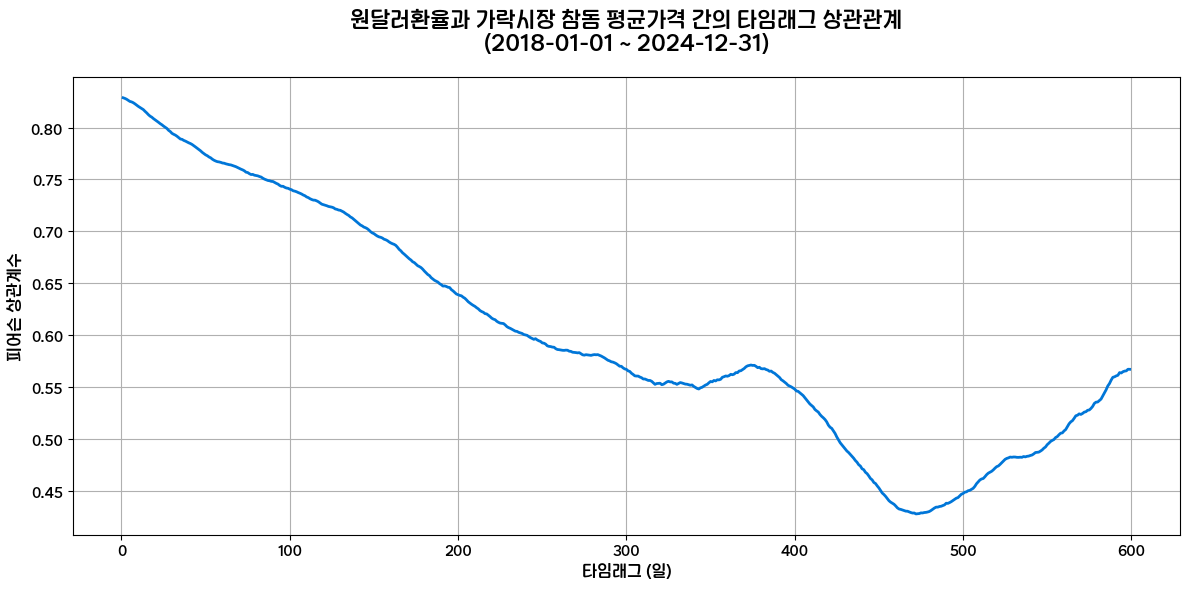

원달러 환율과 가락시장 참돔 평균가격의 상관계수가 가장 높은 타임래그는 1일 입니다.
최대 피어슨 상관계수: 0.8286
P-값: 0.0000e+00


In [23]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 참돔 데이터 필터링 (가락시장)
df_bream = df_price[
    (df_price['item'] == '참돔') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_bream, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    usdkrw_lagged = df_merged['USD/KRW'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        usdkrw_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'원달러환율과 가락시장 참돔 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('usdkrw_bream_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'원달러 환율과 가락시장 참돔 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-3 참돔_가락 ~ VIX

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 419일 |  0.3656  |  2.3807e-42 |



     타임래그(일)  피어슨 상관계수           P-값
0          1 -0.136143  1.482366e-08
1          2 -0.135025  1.965303e-08
2          3 -0.134138  2.458770e-08
3          4 -0.134186  2.453253e-08
4          5 -0.134541  2.273055e-08
..       ...       ...           ...
594      595  0.320626  2.896951e-28
595      596  0.322122  1.670535e-28
596      597  0.324291  7.302536e-29
597      598  0.323049  1.280880e-28
598      599  0.326973  2.721238e-29

[599 rows x 3 columns]


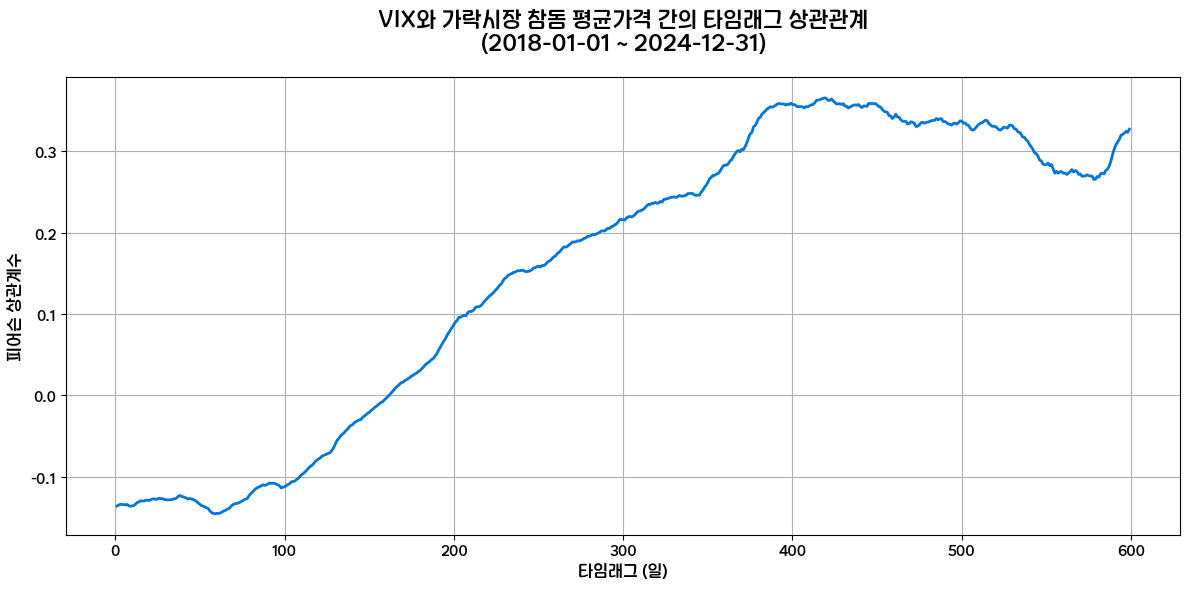

VIX와 가락시장 참돔 평균가격의 상관계수가 가장 높은 타임래그는 419일 입니다.
최대 피어슨 상관계수: 0.3656
P-값: 2.3807e-42


In [25]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 참돔 데이터 필터링 (가락시장)
df_bream = df_price[
    (df_price['item'] == '참돔') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_bream, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    vix_lagged = df_merged['VIX'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        vix_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'VIX와 가락시장 참돔 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('vix_bream_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'VIX와 가락시장 참돔 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-4 참돔_가락 ~ WTI

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 143일 |  0.7205  | 2.2474e-252 |


     타임래그(일)  피어슨 상관계수            P-값
0          1  0.654375  2.000529e-210
1          2  0.653956  6.025309e-210
2          3  0.653599  1.600321e-209
3          4  0.653776  1.497256e-209
4          5  0.654551  4.339147e-210
..       ...       ...            ...
594      595  0.027068   3.648184e-01
595      596  0.026652   3.724522e-01
596      597  0.027374   3.598391e-01
597      598  0.026019   3.843269e-01
598      599  0.023988   4.227584e-01

[599 rows x 3 columns]


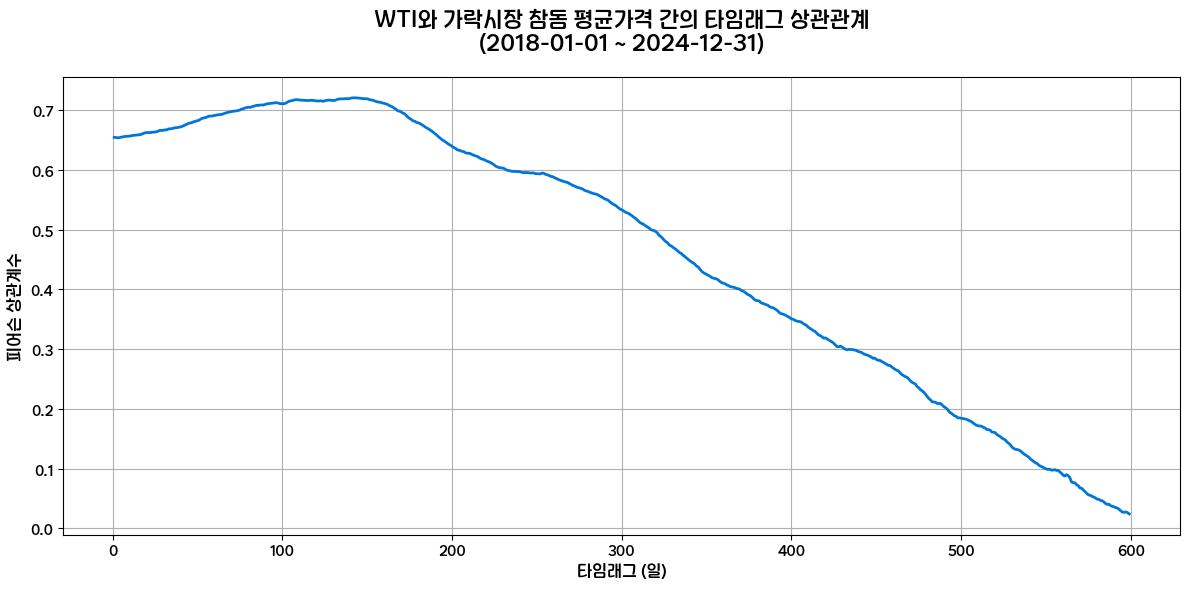

WTI와 가락시장 참돔 평균가격의 상관계수가 가장 높은 타임래그는 143일 입니다.
최대 피어슨 상관계수: 0.7205
P-값: 2.2474e-252


In [26]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 참돔 데이터 필터링 (가락시장)
df_bream = df_price[
    (df_price['item'] == '참돔') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]
# 날짜 기준 병합
df_merged = pd.merge(df_bream, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    wti_lagged = df_merged['WTI'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        wti_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'WTI와 가락시장 참돔 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('wti_bream_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'WTI와 가락시장 참돔 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-5 참돔_가락 ~ Gold

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 411일 | 0.8998  | 0.0000e+0 |

     타임래그(일)  피어슨 상관계수            P-값
0          1  0.682943  3.386382e-236
1          2  0.683152  2.933504e-236
2          3  0.683452  2.076835e-236
3          4  0.683533  2.380655e-236
4          5  0.683970  1.248362e-236
..       ...       ...            ...
594      595  0.817180  1.664003e-270
595      596  0.817619  8.611039e-271
596      597  0.817595  1.598091e-270
597      598  0.817053  1.233643e-269
598      599  0.816431  1.178311e-268

[599 rows x 3 columns]


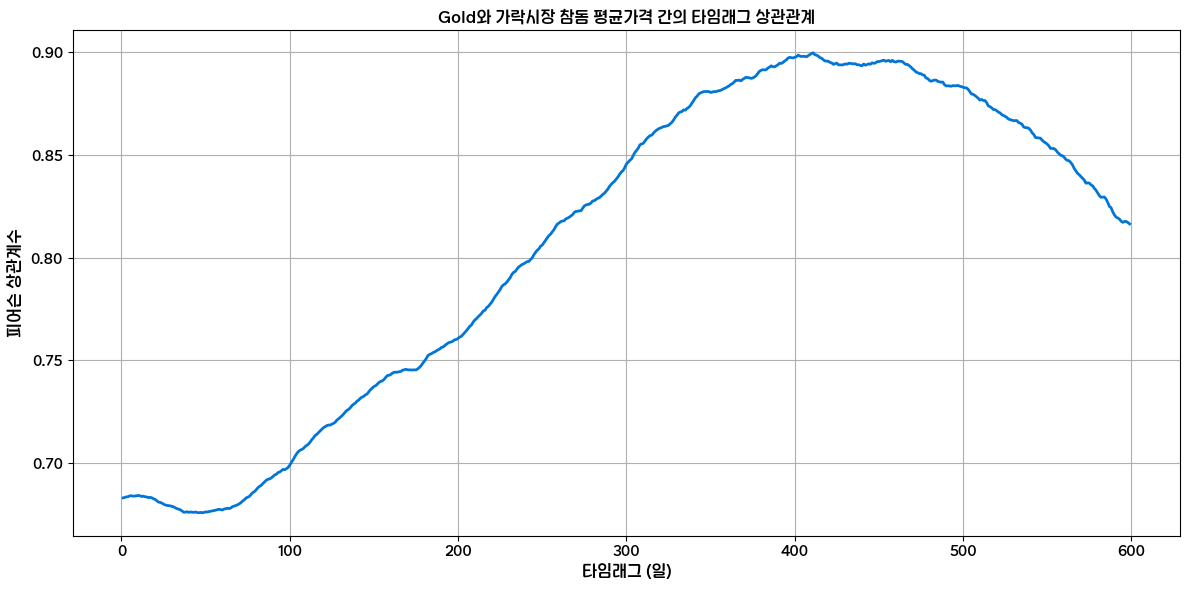

Gold와 가락시장 참돔 평균가격의 상관계수가 가장 높은 타임래그는 411일 입니다.
최대 피어슨 상관계수: 0.8998
P-값: 0.0000e+00


In [28]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 참돔 데이터 필터링 (가락시장)
df_bream = df_price[
    (df_price['item'] == '참돔') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_bream, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    gold_lagged = df_merged['Gold'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        gold_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'Gold와 가락시장 참돔 평균가격 간의 타임래그 상관관계')
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('gold_bream_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'Gold와 가락시장 참돔 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-6 참돔_가락 ~ Silver

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 331일 | 0.7883  | 2.1221e-294 |


     타임래그(일)  피어슨 상관계수            P-값
0          1  0.569752  2.331991e-148
1          2  0.570168  1.552658e-148
2          3  0.571141  4.608121e-149
3          4  0.571875  1.928997e-149
4          5  0.572887  5.381464e-150
..       ...       ...            ...
594      595  0.663067  3.656362e-143
595      596  0.662667  8.308015e-143
596      597  0.662529  1.331196e-142
597      598  0.661600  6.061700e-142
598      599  0.660320  4.340011e-141

[599 rows x 3 columns]


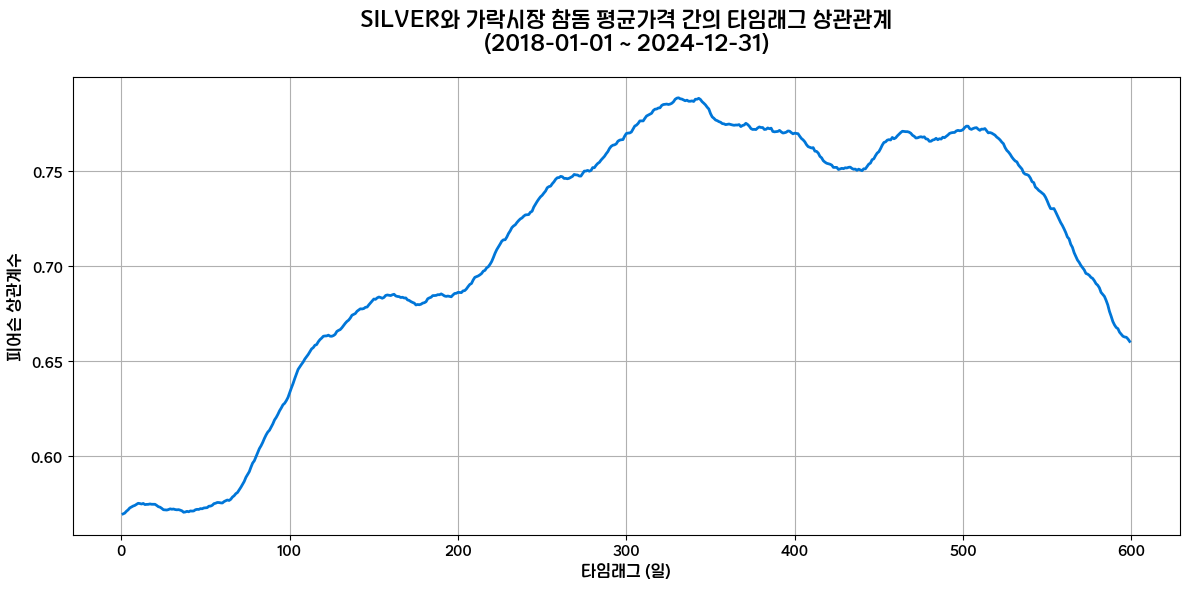

SILVER와 가락시장 참돔 평균가격의 상관계수가 가장 높은 타임래그는 331일 입니다.
최대 피어슨 상관계수: 0.7883
P-값: 2.1221e-294


In [30]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 참돔 데이터 필터링 (가락시장)
df_bream = df_price[
    (df_price['item'] == '참돔') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_bream, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    silver_lagged = df_merged['Silver'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        silver_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'SILVER와 가락시장 참돔 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('silver_bream_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'SILVER와 가락시장 참돔 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-7 참돔_가락 ~ MOVE

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 3일 | 0.8093  | 0.0000e+0 |


     타임래그(일)  피어슨 상관계수           P-값
0          1  0.808629  0.000000e+00
1          2  0.809091  0.000000e+00
2          3  0.809328  0.000000e+00
3          4  0.808254  0.000000e+00
4          5  0.808041  0.000000e+00
..       ...       ...           ...
594      595  0.289022  4.767714e-23
595      596  0.287822  7.635114e-23
596      597  0.286604  1.226996e-22
597      598  0.285639  1.799133e-22
598      599  0.285147  2.232177e-22

[599 rows x 3 columns]


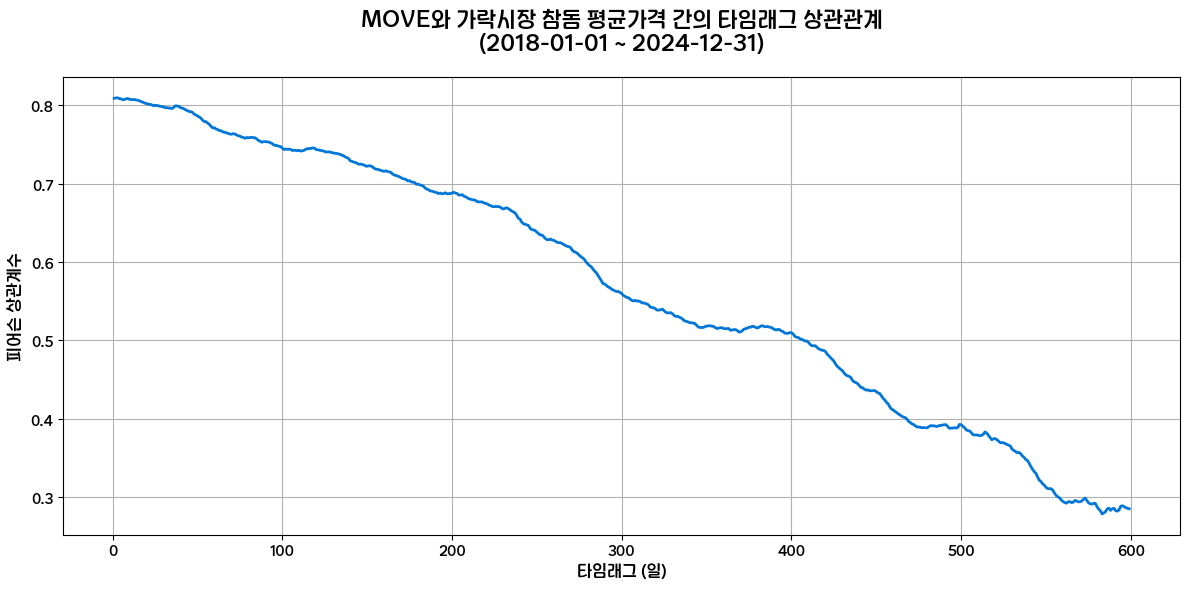

MOVE와 가락시장 참돔 평균가격의 상관계수가 가장 높은 타임래그는 3일 입니다.
최대 피어슨 상관계수: 0.8093
P-값: 0.0000e+00


In [33]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 참돔 데이터 필터링 (가락시장)
df_bream = df_price[
    (df_price['item'] == '참돔') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_bream, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    move_lagged = df_merged['MOVE'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        move_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'MOVE와 가락시장 참돔 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('move_bream_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'MOVE와 가락시장 참돔 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### ~~1-8 참돔_가락 ~ 한국은행 기준금리~~

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 1일 | 0.7958  | 0.0000e+0 |

     타임래그(일)  피어슨 상관계수       P-값
0          1  0.781146  0.000000
1          2  0.780488  0.000000
2          3  0.779852  0.000000
3          4  0.779037  0.000000
4          5  0.778317  0.000000
..       ...       ...       ...
594      595 -0.028996  0.199205
595      596 -0.030647  0.174903
596      597 -0.032394  0.151686
597      598 -0.033781  0.135009
598      599 -0.034886  0.122794

[599 rows x 3 columns]


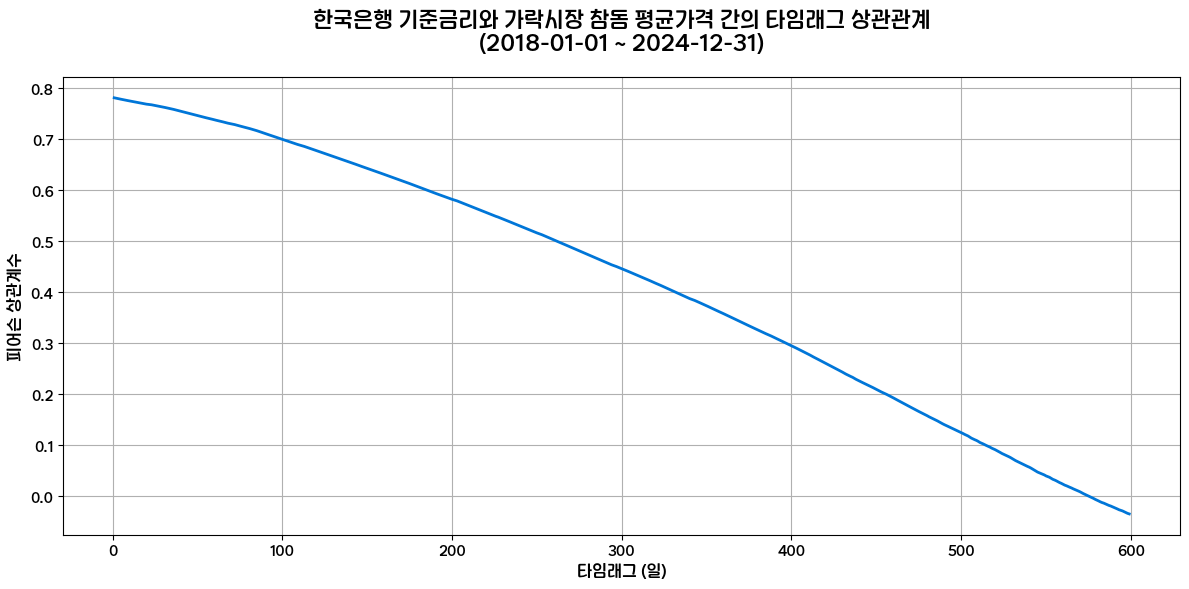

한국은행 기준금리와 가락시장 참돔 평균가격의 상관계수가 가장 높은 타임래그는 1일 입니다.
최대 피어슨 상관계수: 0.7811
P-값: 0.0000e+00


In [21]:
# 경제지표 데이터 로드
df_kr_rate = pd.read_csv('../../data/processed/d한국은행 기준금리_일자별.csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 연어 데이터 필터링 (가락시장)
df_salmon = df_price[
    (df_price['item'] == '연어') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_salmon, df_kr_rate, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    kr_rate_lagged = df_merged['한국은행_기준금리'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        kr_rate_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'한국은행 기준금리와 가락시장 연어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('kr_rate_salmon_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'한국은행 기준금리와 가락시장 연어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-9 참돔_가락 ~ 양식 활참돔(대) 가락시장 거래가격

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 91일 | 0.4598  | 1.0799e-102 |


     타임래그(일)  피어슨 상관계수           P-값
0          1  0.436438  9.983137e-96
1          2  0.437292  4.325649e-96
2          3  0.438653  1.067359e-96
3          4  0.440613  1.342589e-97
4          5  0.442416  1.989323e-98
..       ...       ...           ...
594      595 -0.258758  1.393674e-23
595      596 -0.268615  2.456880e-25
596      597 -0.273207  3.610657e-26
597      598 -0.270322  1.287191e-25
598      599 -0.274369  2.368022e-26

[599 rows x 3 columns]


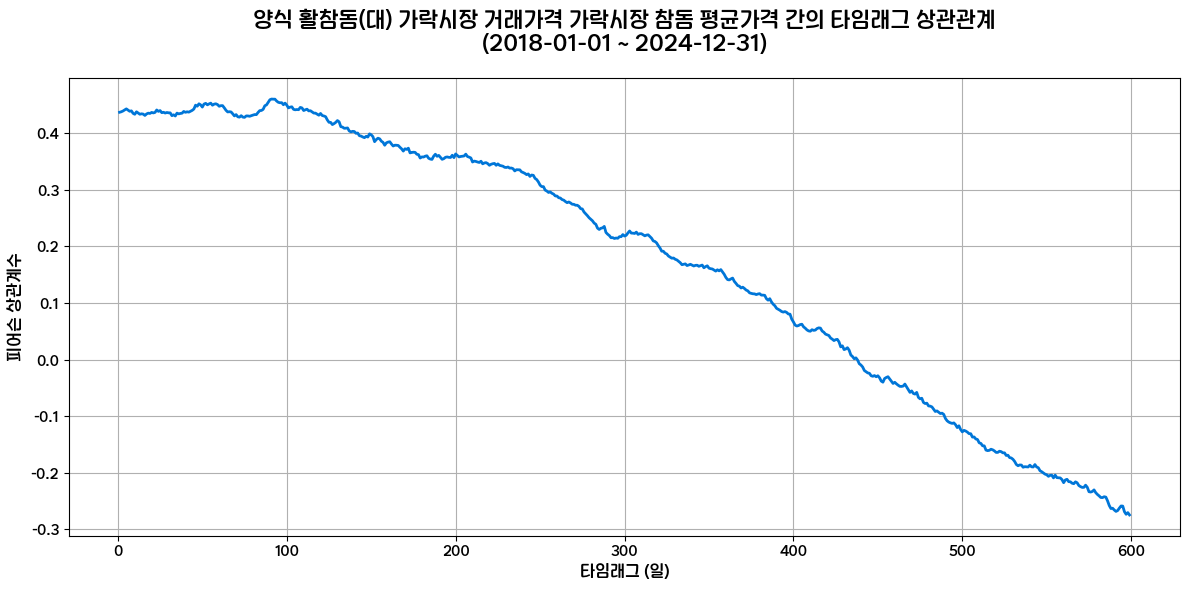

양식 활참돔(대) 가락시장 거래가격 가락시장 참돔 평균가격의 상관계수가 가장 높은 타임래그는 91일 입니다.
최대 피어슨 상관계수: 0.4598
P-값: 1.0799e-102


In [36]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d활참돔(양식)가격_가락.csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 참돔 데이터 필터링 (가락시장)
df_bream = df_price[
    (df_price['item'] == '참돔') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_bream, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    price_lagged = df_merged['참돔_대'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        price_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'양식 활참돔(대) 가락시장 거래가격 가락시장 참돔 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('price_bream_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'양식 활참돔(대) 가락시장 거래가격 가락시장 참돔 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')